<a href="https://colab.research.google.com/github/Henrxque/N007_Curso_Data_Viz_Analise_Gorjetas/blob/main/N007_Curso_Data_Viz_Analise_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Dataset/Gorjetas/tips.csv', sep = ',' , header=0)

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

### Rename columns

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert': 'sobremesa', 
    'day' : 'dia_da_semana' , 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

In [7]:
type(dados)

pandas.core.frame.DataFrame

In [8]:
gorjetas = dados.rename(columns = renomear)

### Traduzindo restante do DF

In [9]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [12]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [13]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [14]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [15]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [16]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
dias = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur': 'Quinta', 
    'Fri' : 'Sexta'
}

In [18]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [19]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [20]:
hora = { 
    'Dinner' : 'Jantar', 
    'Lunch' : 'Almoço'
}

In [21]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Analise 1 - Valor da Gorjeta

In [22]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

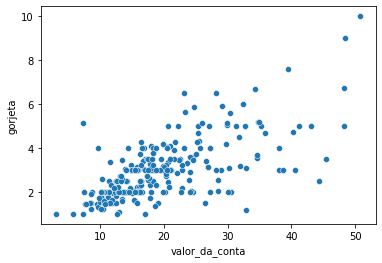

In [23]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente o valor da Gorjeta conforme aumenta o valor da conta**

In [24]:
gorjetas.shape[0]

244

In [25]:
print('A base de dados contén {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos: ')
gorjetas.count()

A base de dados contén 244 registros 

Registros não nulos: 


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

### Criando o Campo Porcentagens

In [26]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [27]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [28]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [29]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


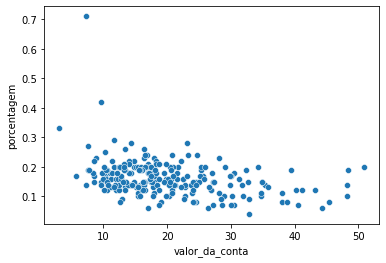

In [30]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**visualmente o valor da conta não é proporcional ao valor da gorjeta**

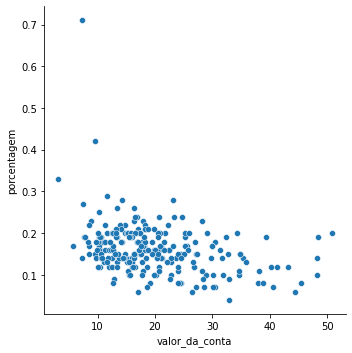

In [31]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

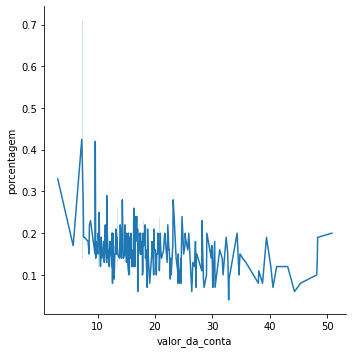

In [32]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

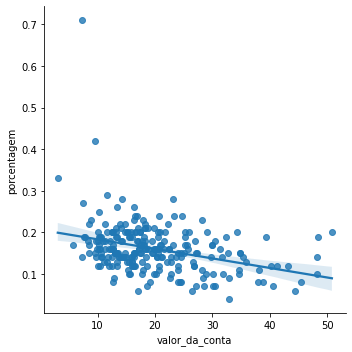

In [33]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

### Análise 2 Sobremesa

In [34]:
#a sobremesa interfere no valor das gorjetas?
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [35]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [36]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [37]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


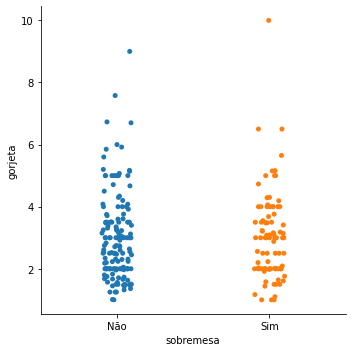

In [38]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

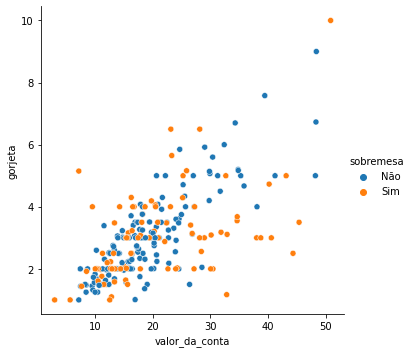

In [41]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

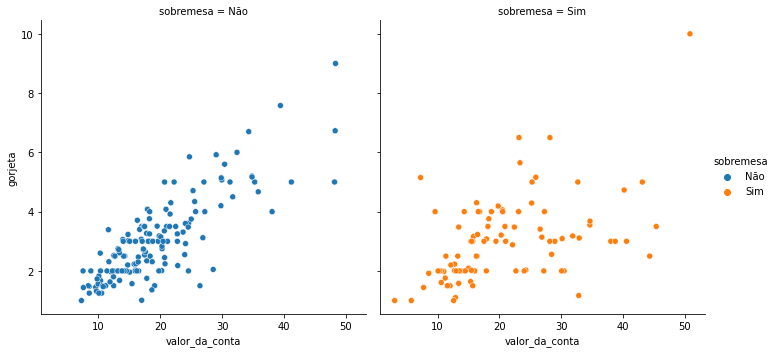

In [42]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

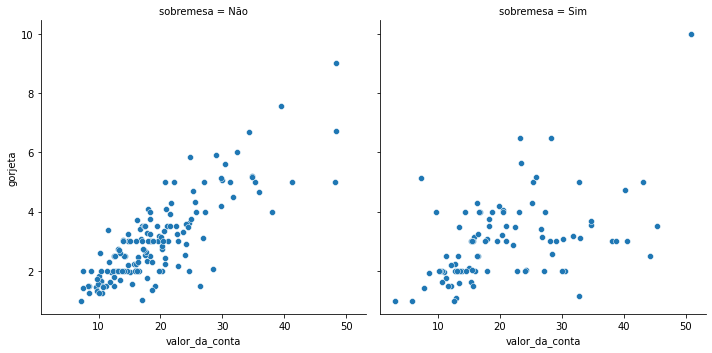

In [43]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

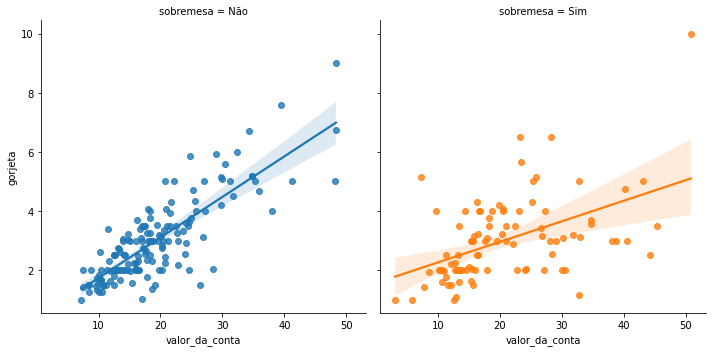

In [46]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

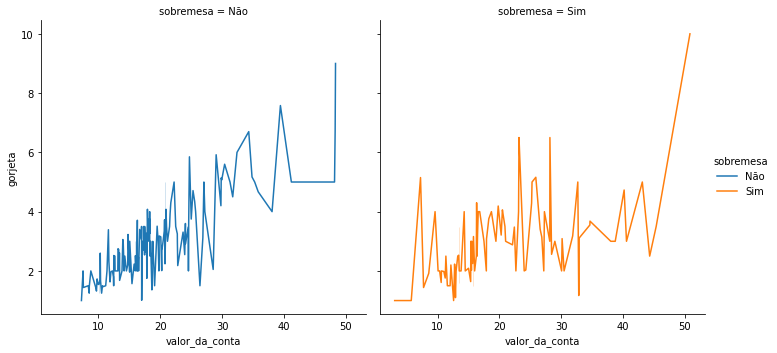

In [47]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

#### teste de hipotese

In [49]:
from scipy.stats import ranksums

In [50]:
gorjetas.query("sobremesa == 'Sim'").porcentagem

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [52]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [53]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [54]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


##### A Distribuição não é a mesma entre os dois grupos, pois o pvalue foi maior que 0,5